In [1]:
# A2 interval 

# Find best interval for every n ={12,14,16,18}
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

for n in [14,16,18]: # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = []
    row = 5
    k_value = [1,2,3]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # interval
        lw = int((n-1)/2) - (k-1)
        hg = int( (n-1)/2 ) + k
        interval.extend( [(lw, hg) for i in range(row)])
        for m in m_value:  # the mth datasets of n
            print( n, k,m, lw, hg)
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= 0.9, num= 2, 
                                    K = lw, L = hg,
                                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" %(n,m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    print( data )
    
    label =[]
    label.extend(["interval"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A2_n%d.csv" %n
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    print( label )
    print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# 2 mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A2_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A2_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A2_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A2_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [0,5,10]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        tmp.append( ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values )
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value"])
    df['interval']=[ngroup[k].iloc[x,1] for x in [0,5,10]]
    df.to_csv("/home/cheng/桌面/data/A2_n%d_result.csv" % group[k])

# 
# # 3, average proportion and time
# groupn = [12,14,16,18]
# mp = []
# for i in groupn:
#     tmp = pd.read_csv('/home/cheng/桌面/data/A2_n%d_result.csv' % i)
#     mp.append( tmp )
#     
# bottom = np.zeros((1,inittrailnum))
# df = pd.DataFrame()
# groupn = [12,14,16,18]
# inittrail = [0.1*i for i in range(inittrailnum)]
# for i in range( len( groupn ) ):
#     df['n%d'% groupn[i] ] = mp[i].iloc[:,1:5].mean( axis= 1).values
#     bottom = bottom + mp[i].iloc[:,1:5].mean( axis= 1).values
#     print( bottom)
# print( df )
# df['average'] = df.mean(axis = 1).values
# print(df['average'])
# df['pho']= inittrail
# df.to_csv("/home/cheng/桌面/data/A5_propotion_result.csv")
# proportionA4 = bottom/len( groupn)
# 
# bottom = np.zeros((1,inittrailnum))
# df = pd.DataFrame()
# for i in range(len( groupn )):
#     df['n%d'% groupn[i] ] = mp[i].iloc[:,5:9].mean( axis= 1).values
#     bottom = bottom + mp[i].iloc[:,5:9].mean( axis= 1).values
# df['average'] = df.mean(axis = 1).values
# df['pho']= inittrail
# df.to_csv("/home/cheng/桌面/data/A5_time_result.csv")
# timeA4 = bottom /len( groupn )

# import matplotlib.pyplot as plt
# pro = proportionA4[0].tolist()
# tim = timeA4[0].tolist()
# print( pro)
# print( tim)
# 
# index = [i for i in range( 1, len(pro) +1 )]
# # plt.figure( figsize=(10,10))
# plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
# plt.plot(index, tim, "*-", label="Time", linewidth=1)
# plt.legend(loc="center right")
# plt.savefig("/home/cheng/桌面/data/A5_result.jpg")
# plt.show()
  
# solution = [0, 7, 6, 5, 11, 3, 0, 10, 4, 9, 8, 1, 2]
# mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=4, vol= 0.9, num= 2, 
#                                       K = 5, L = 6,datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist12_1")
# mtsp.test_eliminate_cross_in_MTSP( solution )

14 1 1 6 7


[[118.13520116738196, 2.1413612365722656], [119.31427507395236, 1.9538664817810059], [119.31427507395236, 2.012698173522949], [119.31427507395236, 2.0159711837768555], [119.31427507395236, 2.0213708877563477], [119.31427507395236, 2.0221352577209473], [119.31427507395236, 2.0423128604888916], [119.31427507395236, 2.046941041946411], [119.31427507395236, 2.050241708755493], [119.31427507395236, 2.1455321311950684]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [], [], []]
14 1 2 6 7


[[150.53843858459086, 1.973731279373169], [150.53843858459086, 2.0029144287109375], [150.53843858459086, 2.0489213466644287], [150.53843858459086, 2.0850751399993896], [150.53843858459086, 2.114724636077881], [150.53843858459086, 2.2220213413238525], [150.53843858459086, 2.26116943359375], [150.53843858459086, 2.3144145011901855], [150.53843858459086, 2.4221270084381104], [150.53843858459086, 2.4717214107513428]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [], []]
14 1 3 6 7


[[146.1077780056427, 2.1245779991149902], [146.1077780056427, 2.151059865951538], [146.1077780056427, 2.1638643741607666], [146.1077780056427, 2.1830615997314453], [146.1077780056427, 2.1929831504821777], [146.1077780056427, 2.2402303218841553], [146.1077780056427, 2.3002583980560303], [146.1077780056427, 2.4444398880004883], [146.1077780056427, 2.5436530113220215], [146.1077780056427, 2.6038060188293457]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], []]
14 1 4 6 7


[[133.78475366622672, 2.2344675064086914], [133.78475366622672, 2.4489073753356934], [133.78475366622672, 2.4703543186187744], [133.78475366622672, 2.5135843753814697], [133.78475366622672, 2.5471270084381104], [133.78475366622672, 2.974374532699585], [133.78475366622672, 3.053013324737549], [133.78475366622672, 3.1955199241638184], [140.44342068850557, 2.5519251823425293], [142.52353739310985, 2.639986276626587]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], [133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672]]
14 2 1 5 8


[[116.96814710400773, 2.1262052059173584], [116.96814710400773, 2.1821892261505127], [119.31427507395236, 2.037355661392212], [119.31427507395236, 2.0496203899383545], [119.31427507395236, 2.1182305812835693], [119.31427507395236, 2.544936180114746], [124.72937843327773, 2.012827157974243], [124.72937843327773, 2.0505030155181885], [124.72937843327773, 2.1393985748291016], [128.04444415823554, 2.063889503479004]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], [133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672]]
14 2 2 5 8


[[150.54321298607854, 2.142080307006836], [150.54321298607854, 2.1434690952301025], [151.57438704068994, 2.0931968688964844], [151.57438704068994, 2.1037778854370117], [151.57438704068994, 2.1539101600646973], [152.72619479072364, 2.3115248680114746], [154.39389501720157, 2.1543350219726562], [156.31991371983457, 2.1742496490478516], [156.31991371983457, 2.1985883712768555], [156.31991371983457, 2.297405242919922]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.54321298607854, 150.54321298607854, 151.57438704068994, 151.57438704068994, 151.57438704068994], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], [133.78475366622672, 133.78475366622672, 133.78475366622672, 133.784

[[146.1077780056427, 2.0661346912384033], [146.1077780056427, 2.0908570289611816], [146.1077780056427, 2.1048359870910645], [146.1077780056427, 2.163370370864868], [146.1077780056427, 2.1891655921936035], [146.1077780056427, 2.1998233795166016], [146.1077780056427, 2.2149946689605713], [146.1077780056427, 2.2261252403259277], [146.1077780056427, 2.2472550868988037], [147.56246706634357, 2.1202101707458496]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.54321298607854, 150.54321298607854, 151.57438704068994, 151.57438704068994, 151.57438704068994], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 1

[[133.78475366622672, 2.288748264312744], [133.78475366622672, 2.331981897354126], [133.78475366622672, 2.3916428089141846], [135.86436820967097, 2.2120699882507324], [135.86436820967097, 2.434316873550415], [139.14158523886138, 2.269967794418335], [139.14158523886138, 2.372128963470459], [140.44342068850557, 2.1453757286071777], [140.71830596701608, 2.2351508140563965], [142.52353739310985, 2.1375436782836914]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.54321298607854, 150.54321298607854, 151.57438704068994, 151.57438704068994, 151.57438704068994], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.10777800564

[[116.96814710400773, 2.3702383041381836], [119.31427507395236, 2.1278724670410156], [119.31427507395236, 2.1645123958587646], [119.31427507395236, 2.171236515045166], [119.31427507395236, 2.206817150115967], [119.31427507395236, 2.210629463195801], [119.31427507395236, 2.3375604152679443], [120.43590123441487, 2.1124753952026367], [120.43590123441487, 2.2798261642456055], [128.12642583327823, 2.1891331672668457]]
=== values [[118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.54321298607854, 150.54321298607854, 151.57438704068994, 151.57438704068994, 151.57438704068994], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077

KeyboardInterrupt: 

In [6]:
# A3 Find best antnum
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 25
for n in range(4): # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [i for i in range(1, antnum +1 )]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= 0.9, num= 2, 
                                    K = lw, L = hg, m = k,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    # print( data )
    
    label =[]
    label.extend(["antnum"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A3_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# 2 mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A3_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A3_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A3_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A3_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [start*5 for start in range( antnum )]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        proportion = ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values
        timevalue = (ngroup[k].iloc[i:i+5, 6:10]).mean(axis= 0).values
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp.append(tmp_lst)
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time"])
    df['antnum']=[ngroup[k].iloc[x,1] for x in [start*5 for start in range(antnum)] ]
    df.to_csv("/home/cheng/桌面/data/A3_n%d_result.csv" % group[k])
print("done")

# 3. average propotion and time
import pandas as pd
proportion = pd.read_excel("/home/cheng/桌面/data/A3_result.xlsx","Sheet1")
timelst = pd.read_excel("/home/cheng/桌面/data/A3_result.xlsx","Sheet2")

import matplotlib.pyplot as plt
pro = proportion['average'].values.tolist()
tim = timelst['average'].values.tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="lower right")
plt.savefig("/home/cheng/桌面/data/A3_result.jpg")
plt.show()

12 1 1


12 1 2


12 1 3


12 1 4


12 2 1


12 2 2


12 2 3


12 2 4


12 3 1


12 3 2


12 3 3


12 3 4


12 4 1


12 4 2


12 4 3


12 4 4


12 5 1


12 5 2


12 5 3


12 5 4


12 6 1


12 6 2


12 6 3


12 6 4


12 7 1


12 7 2


12 7 3


12 7 4


12 8 1


12 8 2


12 8 3


12 8 4


12 9 1


12 9 2


12 9 3


12 9 4


12 10 1


12 10 2


12 10 3


12 10 4


12 11 1


12 11 2


12 11 3


12 11 4


12 12 1


12 12 2


12 12 3


12 12 4


12 13 1


12 13 2


12 13 3


12 13 4


12 14 1


12 14 2


12 14 3


12 14 4


12 15 1


12 15 2


12 15 3


12 15 4


12 16 1


12 16 2


12 16 3


12 16 4


12 17 1


12 17 2


12 17 3


12 17 4


12 18 1


12 18 2


12 18 3


12 18 4


12 19 1


12 19 2


12 19 3


12 19 4


12 20 1


12 20 2


12 20 3


12 20 4


12 21 1


12 21 2


12 21 3


12 21 4


12 22 1


12 22 2


12 22 3


12 22 4


12 23 1


12 23 2


12 23 3


12 23 4


12 24 1


12 24 2


12 24 3


12 24 4


12 25 1


12 25 2


12 25 3


12 25 4


14 1 1


14 1 2


14 1 3


14 1 4


14 2 1


14 2 2


14 2 3


14 2 4


14 3 1


14 3 2


14 3 3


14 3 4


14 4 1


14 4 2


14 4 3


14 4 4


14 5 1


14 5 2


14 5 3


14 5 4


14 6 1


14 6 2


14 6 3


14 6 4


14 7 1


14 7 2


14 7 3


14 7 4


14 8 1


14 8 2


14 8 3


14 8 4


14 9 1


14 9 2


14 9 3


14 9 4


14 10 1


14 10 2


14 10 3


14 10 4


14 11 1


14 11 2


14 11 3


14 11 4


14 12 1


14 12 2


14 12 3


14 12 4


14 13 1


14 13 2


14 13 3


14 13 4


14 14 1


KeyboardInterrupt: 

In [3]:
# A4 

# 1, ensure initial amount of trial
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 7
for n in range(4): # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [1,10,100,1000]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= 0.9, num= 2, 
                                    K = lw, L = hg, m = antnum, inittrail=k,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    # print( data )
    
    label =[]
    label.extend(["inittrail"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A4_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# 2, mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A4_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A4_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A4_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A4_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
inittrailnum = 4
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [start*5 for start in range( inittrailnum )]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        proportion = ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values
        timevalue = (ngroup[k].iloc[i:i+5, 6:10]).mean(axis= 0).values
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp.append(tmp_lst)
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time"])
    df['inittrail']=[ngroup[k].iloc[x,1] for x in [start*5 for start in range(inittrailnum)] ]
    df.to_csv("/home/cheng/桌面/data/A4_n%d_result.csv" % group[k])
print("done")

# 3, average proportion and time
bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
groupn = [12,14,16,18]
inittrail = [1, 10,100,1000]
for i in range(inittrailnum):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,1:5].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,1:5].mean( axis= 1).values
    print( bottom)
print( df )
df['average'] = df.mean(axis = 1).values
print(df['average'])
df['inittrail']= inittrail
df.to_csv("/home/cheng/桌面/data/A4_propotion_result.csv")
proportionA4 = bottom/inittrailnum

bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
for i in range(inittrailnum):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,5:9].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,5:9].mean( axis= 1).values
df['average'] = df.mean(axis = 1).values
df['inittrail']= inittrail
df.to_csv("/home/cheng/桌面/data/A4_time_result.csv")
timeA4 = bottom /inittrailnum

import matplotlib.pyplot as plt
pro = proportionA4[0].tolist()
tim = timeA4[0].tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="center right")
plt.savefig("/home/cheng/桌面/data/A4_result.jpg")
plt.show()


12 1 1


KeyboardInterrupt: 

In [31]:
# A5

# 1, find best p
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 7
for n in range(4): # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [ 0.1*i for i in range(1,10)]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= k, num= 2, 
                                    K = lw, L = hg, m = antnum, inittrail=1,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    # print( data )
    
    label =[]
    label.extend(["pho"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A5_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# 2, mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A5_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A5_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A5_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A5_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
inittrailnum = 9
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [start*5 for start in range( inittrailnum )]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        proportion = ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values
        timevalue = (ngroup[k].iloc[i:i+5, 6:10]).mean(axis= 0).values
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp.append(tmp_lst)
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time"])
    df['pho']=[ngroup[k].iloc[x,1] for x in [start*5 for start in range(inittrailnum)] ]
    df.to_csv("/home/cheng/桌面/data/A5_n%d_result.csv" % group[k])
print("done")

# 3, average proportion and time
groupn = [12,14,16,18]
mp = []
for i in groupn:
    tmp = pd.read_csv('/home/cheng/桌面/data/A5_n%d_result.csv' % i)
    mp.append( tmp )
    
bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
groupn = [12,14,16,18]
inittrail = [0.1*i for i in range(inittrailnum)]
for i in range( len( groupn ) ):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,1:5].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,1:5].mean( axis= 1).values
    print( bottom)
print( df )
df['average'] = df.mean(axis = 1).values
print(df['average'])
df['pho']= inittrail
df.to_csv("/home/cheng/桌面/data/A5_propotion_result.csv")
proportionA4 = bottom/len( groupn)

bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
for i in range(len( groupn )):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,5:9].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,5:9].mean( axis= 1).values
df['average'] = df.mean(axis = 1).values
df['pho']= inittrail
df.to_csv("/home/cheng/桌面/data/A5_time_result.csv")
timeA4 = bottom /len( groupn )

import matplotlib.pyplot as plt
pro = proportionA4[0].tolist()
tim = timeA4[0].tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="center right")
plt.savefig("/home/cheng/桌面/data/A5_result.jpg")
plt.show()



12 0.1 1


12 0.1 2


12 0.1 3


12 0.1 4


12 0.2 1


12 0.2 2


12 0.2 3


12 0.2 4


12 0.30000000000000004 1


12 0.30000000000000004 2


12 0.30000000000000004 3


12 0.30000000000000004 4


12 0.4 1


12 0.4 2


12 0.4 3


12 0.4 4


12 0.5 1


12 0.5 2


12 0.5 3


12 0.5 4


12 0.6000000000000001 1


12 0.6000000000000001 2


12 0.6000000000000001 3


12 0.6000000000000001 4


12 0.7000000000000001 1


12 0.7000000000000001 2


12 0.7000000000000001 3


12 0.7000000000000001 4


12 0.8 1


12 0.8 2


12 0.8 3


12 0.8 4


12 0.9 1


12 0.9 2


12 0.9 3


12 0.9 4


14 0.1 1


14 0.1 2


14 0.1 3


14 0.1 4


14 0.2 1


14 0.2 2


14 0.2 3


14 0.2 4


14 0.30000000000000004 1


14 0.30000000000000004 2


14 0.30000000000000004 3


14 0.30000000000000004 4


14 0.4 1


14 0.4 2


14 0.4 3


14 0.4 4


14 0.5 1


14 0.5 2


14 0.5 3


14 0.5 4


14 0.6000000000000001 1


14 0.6000000000000001 2


14 0.6000000000000001 3


14 0.6000000000000001 4


14 0.7000000000000001 1


14 0.7000000000000001 2


14 0.7000000000000001 3


14 0.7000000000000001 4


14 0.8 1


14 0.8 2


14 0.8 3


14 0.8 4


14 0.9 1


14 0.9 2


14 0.9 3


14 0.9 4


16 0.1 1


16 0.1 2


16 0.1 3


16 0.1 4


16 0.2 1


16 0.2 2


16 0.2 3


16 0.2 4


16 0.30000000000000004 1


16 0.30000000000000004 2


16 0.30000000000000004 3


16 0.30000000000000004 4


16 0.4 1


16 0.4 2


16 0.4 3


16 0.4 4


16 0.5 1


16 0.5 2


16 0.5 3


16 0.5 4


16 0.6000000000000001 1


16 0.6000000000000001 2


16 0.6000000000000001 3


16 0.6000000000000001 4


16 0.7000000000000001 1


16 0.7000000000000001 2


16 0.7000000000000001 3


16 0.7000000000000001 4


16 0.8 1


16 0.8 2


16 0.8 3


16 0.8 4


16 0.9 1


16 0.9 2


16 0.9 3


16 0.9 4


18 0.1 1


18 0.1 2


18 0.1 3


18 0.1 4


18 0.2 1


18 0.2 2


18 0.2 3


18 0.2 4


18 0.30000000000000004 1


18 0.30000000000000004 2


18 0.30000000000000004 3


18 0.30000000000000004 4


18 0.4 1


18 0.4 2


18 0.4 3


18 0.4 4


18 0.5 1


18 0.5 2


18 0.5 3


18 0.5 4


18 0.6000000000000001 1


18 0.6000000000000001 2


18 0.6000000000000001 3


18 0.6000000000000001 4


18 0.7000000000000001 1


18 0.7000000000000001 2


18 0.7000000000000001 3


18 0.7000000000000001 4


18 0.8 1


18 0.8 2


18 0.8 3


18 0.8 4


18 0.9 1


18 0.9 2


18 0.9 3


18 0.9 4


done


ValueError: operands could not be broadcast together with shapes (1,9) (4,) 

12 1 1


12 1 2


12 1 3
12 1 

4
12 2 1


12 2 2


12 2 3


12 2 4


12 3 1


12 3 2


12 3 3


12 3 4


12 4 1


12 4 2


12 4 3


12 4 4


12 5 1


12 5 2


12 5 3


12 5 4


12 6 1


12 6 2


12 6 3


12 6 4


12 7 1


12 7 2


12 7 3


12 7 4


12 8 1


12 8 2


12 8 3


12 8 4


12 9 1


12 9 2


12 9 3


12 9 4


12 10 1


12 10 2


12 10 3


12 10 4


12 11 1


12 11 2


12 11 3


12 11 4


12 12 1


12 12 2


12 12 3


12 12 4


12 13 1


12 13 2


12 13 3


12 13 4


12 14 1


12 14 2


12 14 3


12 14 4


12 15 1


12 15 2


12 15 3


12 15 4


12 16 1


12 16 2


12 16 3


12 16 4


12 17 1


12 17 2


12 17 3


12 17 4


12 18 1


12 18 2


12 18 3


12 18 4


12 19 1


12 19 2


12 19 3


12 19 4


12 20 1


12 20 2


12 20 3


12 20 4


12 21 1


12 21 2


12 21 3


12 21 4


12 22 1


12 22 2


12 22 3


12 22 4


12 23 1


12 23 2


12 23 3


12 23 4


12 24 1


12 24 2


12 24 3


12 24 4


12 25 1


12 25 2


12 25 3


12 25 4


14 1 1


14 1 2


14 1 3


14 1 4


14 2 1


14 2 2


14 2 3


14 2 4


14 3 1


14 3 2


14 3 3


14 3 4


14 4 1


14 4 2


14 4 3


14 4 4


14 5 1


14 5 2


14 5 3


14 5 4


14 6 1


14 6 2


14 6 3


14 6 4


14 7 1


14 7 2


14 7 3


14 7 4


14 8 1


14 8 2


14 8 3


14 8 4


14 9 1


14 9 2


14 9 3


14 9 4


14 10 1


14 10 2


14 10 3


14 10 4


14 11 1


14 11 2


14 11 3


14 11 4


14 12 1


14 12 2


14 12 3


14 12 4


14 13 1


14 13 2


14 13 3


14 13 4


14 14 1


14 14 2


14 14 3


14 14 4


14 15 1


14 15 2


14 15 3


14 15 4


14 16 1


14 16 2


14 16 3


14 16 4


14 17 1


14 17 2


14 17 3


14 17 4


14 18 1


14 18 2


14 18 3


14 18 4


14 19 1


14 19 2


14 19 3


14 19 4


14 20 1


14 20 2


14 20 3


14 20 4


14 21 1


14 21 2


14 21 3


14 21 4


14 22 1


14 22 2


14 22 3


14 22 4


14 23 1


14 23 2


14 23 3


14 23 4


14 24 1


14 24 2


14 24 3


14 24 4


14 25 1


14 25 2


14 25 3


14 25 4


16 1 1


16 1 2


16 1 3


16 1 4


16 2 1


16 2 2


16 2 3


16 2 4


16 3 1


16 3 2


16 3 3


16 3 4


16 4 1


16 4 2


16 4 3


16 4 4


16 5 1


16 5 2


16 5 3


16 5 4


16 6 1


16 6 2


16 6 3


16 6 4


16 7 1


16 7 2


16 7 3


16 7 4


16 8 1


16 8 2


16 8 3


16 8 4


16 9 1


16 9 2


16 9 3


16 9 4


16 10 1


16 10 2


16 10 3


16 10 4


16 11 1


16 11 2


16 11 3


16 11 4


16 12 1


16 12 2


16 12 3


16 12 4


16 13 1


16 13 2


16 13 3


16 13 4


16 14 1


16 14 2


16 14 3


16 14 4


16 15 1


16 15 2


16 15 3


16 15 4


16 16 1


16 16 2


16 16 3


16 16 4


16 17 1


16 17 2


16 17 3


16 17 4


16 18 1


16 18 2


16 18 3


16 18 4


16 19 1


16 19 2


16 19 3


16 19 4


16 20 1


16 20 2


16 20 3


16 20 4


16 21 1


16 21 2


16 21 3


16 21 4


16 22 1


16 22 2


16 22 3


16 22 4


16 23 1


16 23 2


16 23 3


16 23 4


16 24 1


16 24 2


16 24 3


16 24 4


16 25 1


16 25 2


16 25 3


16 25 4


18 1 1


18 1 2


18 1 3


18 1 4


18 2 1


18 2 2


18 2 3


18 2 4


18 3 1


18 3 2


18 3 3


18 3 4


18 4 1


18 4 2


18 4 3


18 4 4


18 5 1


18 5 2


18 5 3


18 5 4


18 6 1


18 6 2


18 6 3


18 6 4


18 7 1


18 7 2


18 7 3


18 7 4


18 8 1


18 8 2


18 8 3


18 8 4


18 9 1


18 9 2


18 9 3


18 9 4


18 10 1


18 10 2


18 10 3


18 10 4


18 11 1


18 11 2


18 11 3


18 11 4


18 12 1


18 12 2


18 12 3


18 12 4


18 13 1


18 13 2


18 13 3


18 13 4


18 14 1


18 14 2


18 14 3


18 14 4


18 15 1


18 15 2


18 15 3


18 15 4


18 16 1


18 16 2


18 16 3


18 16 4


18 17 1


18 17 2


18 17 3


18 17 4


18 18 1


18 18 2


18 18 3


18 18 4


18 19 1


18 19 2


18 19 3


18 19 4


18 20 1


18 20 2


18 20 3


18 20 4


18 21 1


18 21 2


18 21 3


18 21 4


18 22 1


18 22 2


18 22 3


18 22 4


18 23 1


18 23 2


18 23 3


18 23 4


18 24 1


18 24 2


18 24 3


18 24 4


18 25 1


18 25 2


18 25 3


18 25 4


done
[[ 0.931    0.94975  0.9375   0.96225  0.955    0.96525  0.96175  0.96725
   0.96725  0.968    0.9675   0.971    0.96775  0.97075  0.967    0.9745
   0.981    0.97     0.9845   0.97525  0.97475  0.9725   0.9805   0.9815
   0.98375]]
[[ 1.86575  1.926    1.9205   1.94425  1.941    1.95375  1.94775  1.95275
   1.9535   1.95525  1.9545   1.957    1.955    1.95775  1.953    1.9615
   1.969    1.9585   1.97275  1.9625   1.963    1.96225  1.9685   1.9675
   1.97325]]
[[ 2.757    2.8565   2.86675  2.86825  2.8885   2.90075  2.894    2.90225
   2.9045   2.8985   2.90625  2.90775  2.91     2.90325  2.9085   2.916
   2.9295   2.91825  2.9395   2.92225  2.92825  2.929    2.93475  2.93425
   2.93675]]
[[ 3.64125  3.74425  3.7635   3.79525  3.804    3.8225   3.80625  3.8305
   3.85225  3.8375   3.84125  3.839    3.857    3.8365   3.8685   3.87275
   3.87425  3.87375  3.8965   3.87325  3.87225  3.8915   3.89375  3.89975
   3.89825]]
        n12      n14      n16      n18
0   0.93100  0.93475  0

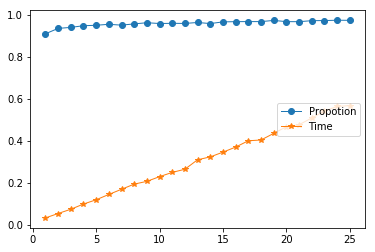

In [41]:
# A6

# 1, find cyclenum
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 7
cyclenum = 25
for n in range(4): # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [ i for i in range(1,cyclenum+1)]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= k,alpha=1,beta=5, vol=0.2, num= 2, 
                                    K = lw, L = hg, m = antnum, inittrail=1,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    # print( data )
    
    label =[]
    label.extend(["cyclenum"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A6_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# 2, mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A6_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A6_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A6_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A6_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
inittrailnum = cyclenum
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [start*5 for start in range( inittrailnum )]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        proportion = ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values
        timevalue = (ngroup[k].iloc[i:i+5, 6:10]).mean(axis= 0).values
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp.append(tmp_lst)
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time"])
    df['cyclenum']=[ngroup[k].iloc[x,1] for x in [start*5 for start in range(inittrailnum)] ]
    df.to_csv("/home/cheng/桌面/data/A6_n%d_result.csv" % group[k])
print("done")

# 3, average proportion and time
groupn = [12,14,16,18]
mp = []
for i in groupn:
    tmp = pd.read_csv('/home/cheng/桌面/data/A6_n%d_result.csv' % i)
    mp.append( tmp )
    
bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
groupn = [12,14,16,18]
inittrail = [i+1 for i in range(inittrailnum)]
for i in range( len( groupn ) ):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,1:5].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,1:5].mean( axis= 1).values
    print( bottom)
print( df )
df['average'] = df.mean(axis = 1).values
print(df['average'])
df['cyclenum']= inittrail
df.to_csv("/home/cheng/桌面/data/A6_propotion_result.csv")
proportionA4 = bottom/len( groupn)

bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
for i in range(len( groupn )):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,5:9].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,5:9].mean( axis= 1).values
df['average'] = df.mean(axis = 1).values
df['cyclenum']= inittrail
df.to_csv("/home/cheng/桌面/data/A6_time_result.csv")
timeA4 = bottom /len( groupn )

# plot trend of time and proportion
import matplotlib.pyplot as plt
pro = proportionA4[0].tolist()
tim = timeA4[0].tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="lower right")
plt.savefig("/home/cheng/桌面/data/A6_result.jpg")
plt.show()



In [8]:
# A7 comparision to Lingo 17

# 1
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 7
cyclenum = 18
# for n in range(4): # n
for n in [3]: # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    routelst=[ [] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [ cyclenum ]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 100 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= k,alpha=1,beta=5, vol=0.2, num= 2, 
                                    K = lw, L = hg, m = antnum, inittrail=1,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                # print("mtsp=====best==route")
                # print(mtsp.return_best_route())
                lst.append( [ mtsp.return_best()[0], b-a, 
                              mtsp.return_best_route().tolist()] )
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            # print(lst)
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            routelst[m-1].extend( [lst[i][2] for i in range( row)])
            # print("show========routelst")
            # print( routelst )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    data.extend(routelst)
    # print( data )
    
    label =[]
    label.extend(["cyclenum"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    label.extend(["p%d_route"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A7_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)

# 2, mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A7_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A7_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A7_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A7_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
inittrailnum = cyclenum
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [0]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i,2:6]
        proportion = ( optional.iloc[k,1:5] /inter)
        timevalue = (ngroup[k].iloc[i, 6:10])
        routevalue = (ngroup[k].iloc[i,10:14])
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp_lst.extend( routevalue.tolist() )
        tmp.append(tmp_lst)
        # print( tmp )
    # print( tmp )
    tmp_ = np.array( tmp )
    # tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time",
                                           "p1_route","p2_route","p3_route","p4_route"])
    df['cyclenum']=[ngroup[k].iloc[x,1] for x in [0] ]
    df.to_csv("/home/cheng/桌面/data/A7_n%d_result.csv" % group[k])
print("done")


18 18 1


18 18 2


18 18 3


18 18 4


done


[0, 12, 17, 14, 9, 2, 1, 0, 5, 11, 10, 8, 6, 7, 13, 3, 15, 4, 16]


<class 'numpy.ndarray'>


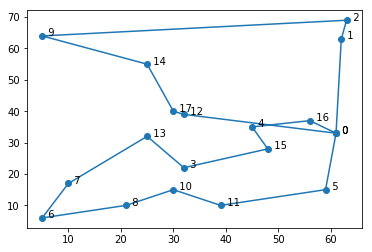

[163 163]


In [3]:
# Plot route of the optimal solution
import pandas  as pd
seq = 18
dataset = 4
length = 2
mp = []
for i in range( length ):
    tmp = pd.read_excel('/home/cheng/桌面/dist.xlsx','dist%d_%d_%d' % (seq, dataset, i+1)).values
    mp.append( tmp )

route = []
for k in range( length ):
    tmp = [0]
    i = mp[k][0].tolist().index(1) 
    while i != 0:
        tmp.append( int(i) )
        i = mp[k][i].tolist().index(1)
    route.append( tmp )

result = []
for i in route:
    result.extend( i )
print( result )

# solution = [0, 7, 6, 5, 11, 3, 0, 10, 4, 9, 8, 1, 2]
# result = [0, 7, 6, 5, 3, 11, 0, 10, 4, 9, 8, 1, 2] 

# plot result 
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

mtsp = AntColonyAlgorithmForMTSP(iter_max= 20, num= length, K = 3, L = 7,
                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" % (seq, dataset) )
import numpy as np
result = np.array( result )
mtsp.plot_route( result )
mtsp.print_length(result)

=====
<class 'numpy.ndarray'>


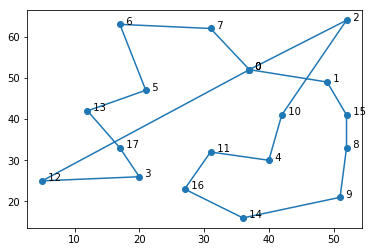

In [1]:
# on my algorithm
p1_route=[0.0, 7.0, 6.0, 5.0, 13.0, 17.0, 12.0, 3.0, 16.0, 11.0, 0.0, 
          10.0, 4.0, 14.0, 9.0, 8.0, 15.0, 1.0, 2.0]
p2_route=[0.0, 15.0, 16.0, 6.0, 17.0, 10.0, 5.0, 11.0, 9.0, 4.0, 0.0, 
          14.0, 12.0, 13.0, 8.0, 1.0, 2.0, 7.0, 3.0]
p3_route=[0.0, 1.0, 10.0, 5.0, 3.0, 12.0, 4.0, 17.0, 13.0, 16.0, 0.0, 
          2.0, 8.0, 7.0, 6.0, 9.0, 14.0, 11.0, 15.0]
p4_route=[0.0, 16.0, 4.0, 12.0, 17.0, 14.0, 9.0, 2.0, 1.0, 0.0, 15.0, 
          13.0, 7.0, 6.0, 8.0, 10.0, 3.0, 11.0, 5.0]

seq = 18
dataset = 1
result = [int(i) for i in p3_route]

# plot result 
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

mtsp = AntColonyAlgorithmForMTSP(iter_max= 20, num= 2, K = 6, L = 11,
                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" % (seq, dataset) )
# import numpy as np
# result = np.array( result )
# mtsp.plot_route( result )
# mtsp.print_length(result)
mtsp.excution()
mtsp.plot()

<class 'numpy.ndarray'>


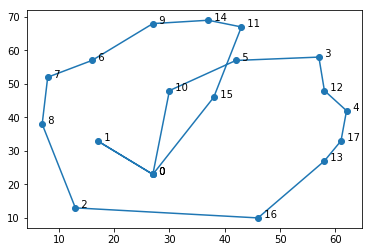

[ 28 270]


In [2]:
# on my algorithm
p1_route=[0.0, 7.0, 6.0, 5.0, 13.0, 17.0, 12.0, 3.0, 16.0, 11.0, 0.0, 
          10.0, 4.0, 14.0, 9.0, 8.0, 15.0, 1.0, 2.0]
p2_route=[0.0, 15.0, 16.0, 6.0, 17.0, 10.0, 5.0, 11.0, 9.0, 4.0, 0.0, 
          14.0, 12.0, 13.0, 8.0, 1.0, 2.0, 7.0, 3.0]
p3_route=[0.0, 1.0, 10.0, 5.0, 3.0, 12.0, 4.0, 17.0, 13.0, 16.0, 0.0, 
          2.0, 8.0, 7.0, 6.0, 9.0, 14.0, 11.0, 15.0]
p4_route=[0.0, 16.0, 4.0, 12.0, 17.0, 14.0, 9.0, 2.0, 1.0, 0.0, 15.0, 
          13.0, 7.0, 6.0, 8.0, 10.0, 3.0, 11.0, 5.0]

seq = 18
dataset = 3

p3_route=[0.0, 1.0, 0.0, 10.0, 5.0, 3.0, 12.0, 4.0, 17.0, 13.0, 16.0, 
          2.0, 8.0, 7.0, 6.0, 9.0, 14.0, 11.0, 15.0]
result = [int(i) for i in p3_route]

# plot result 
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

mtsp = AntColonyAlgorithmForMTSP(iter_max= 20, num= 2, K = 1, L = 18,
                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" % (seq, dataset) )
import numpy as np
result = np.array( result )
mtsp.plot_route( result )
mtsp.print_length(result)

[[0, 2, 1, 15, 8, 9, 14, 16, 4, 10, 0, 11, 3, 12, 17, 13, 5, 6, 7, 0], [0, 4, 9, 11, 5, 10, 17, 6, 16, 15, 0, 3, 7, 2, 1, 8, 13, 12, 14, 0], [0, 15, 5, 11, 3, 12, 4, 17, 13, 16, 0, 2, 1, 8, 7, 6, 9, 14, 10, 0], [0, 12, 17, 14, 9, 2, 1, 0, 5, 11, 10, 8, 6, 7, 13, 3, 15, 4, 16, 0]] [[0, 7, 6, 5, 13, 17, 12, 3, 16, 11, 0, 10, 4, 14, 9, 8, 15, 1, 2, 0], [0, 15, 16, 6, 17, 10, 5, 11, 9, 4, 0, 14, 12, 13, 8, 1, 2, 7, 3, 0], [0, 1, 10, 5, 3, 12, 4, 17, 13, 16, 0, 2, 8, 7, 6, 9, 14, 11, 15, 0], [0, 16, 4, 12, 17, 14, 9, 2, 1, 0, 15, 13, 7, 6, 8, 10, 3, 11, 5, 0]]
[[[37.0, 52.0], [52.0, 64.0], [49.0, 49.0], [52.0, 41.0], [52.0, 33.0], [51.0, 21.0], [36.0, 16.0], [27.0, 23.0], [40.0, 30.0], [42.0, 41.0], [37.0, 52.0], [31.0, 32.0], [20.0, 26.0], [5.0, 25.0], [17.0, 33.0], [12.0, 42.0], [21.0, 47.0], [17.0, 63.0], [31.0, 62.0], [37.0, 52.0]], [[31.0, 62.0], [31.0, 32.0], [27.0, 23.0], [13.0, 13.0], [5.0, 25.0], [17.0, 33.0], [7.0, 38.0], [12.0, 42.0], [8.0, 52.0], [16.0, 57.0], [31.0, 62.0], [42.

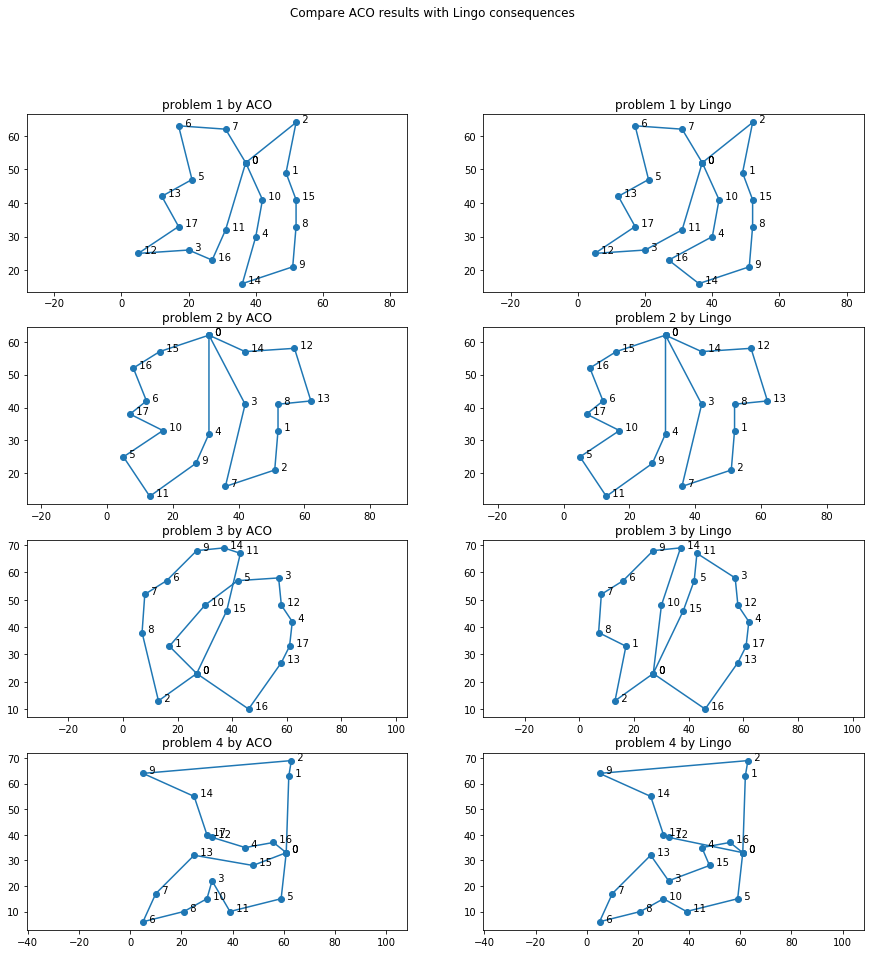

In [30]:
lingo18_1_route=[0, 2, 1, 15, 8, 9, 14, 16, 4, 10, 0, 
                 11, 3, 12, 17, 13, 5, 6, 7]
lingo18_2_route=[0, 4, 9, 11, 5, 10, 17, 6, 16, 15, 0, 
                 3, 7, 2, 1, 8, 13, 12, 14]
lingo18_3_route=[0, 15, 5, 11, 3, 12, 4, 17, 13, 16, 0, 
                 2, 1, 8, 7, 6, 9, 14, 10]
lingo18_4_route=[0, 12, 17, 14, 9, 2, 1, 0, 5, 11, 10, 
                 8, 6, 7, 13, 3, 15, 4, 16]
lingo=[lingo18_1_route,lingo18_2_route,lingo18_3_route,lingo18_4_route]

ACO_1_route=[0.0, 7.0, 6.0, 5.0, 13.0, 17.0, 12.0, 3.0, 16.0, 11.0, 0.0, 
          10.0, 4.0, 14.0, 9.0, 8.0, 15.0, 1.0, 2.0]
ACO_2_route=[0.0, 15.0, 16.0, 6.0, 17.0, 10.0, 5.0, 11.0, 9.0, 4.0, 0.0, 
          14.0, 12.0, 13.0, 8.0, 1.0, 2.0, 7.0, 3.0]
ACO_3_route=[0.0, 1.0, 10.0, 5.0, 3.0, 12.0, 4.0, 17.0, 13.0, 16.0, 0.0, 
          2.0, 8.0, 7.0, 6.0, 9.0, 14.0, 11.0, 15.0]
ACO_4_route=[0.0, 16.0, 4.0, 12.0, 17.0, 14.0, 9.0, 2.0, 1.0, 0.0, 15.0, 
          13.0, 7.0, 6.0, 8.0, 10.0, 3.0, 11.0, 5.0]
ACO=[ACO_1_route,ACO_2_route,ACO_3_route,ACO_4_route]

for i in range(4):
    for j in range(len(lingo[0])):
        lingo[i][j]=int(lingo[i][j])
        ACO[i][j]=int(ACO[i][j])
for i in range(4):
    lingo[i].append(0)
    ACO[i].append(0)
print(lingo, ACO)

lingo_result = []
ACO_result =[]

import numpy as np

for i in range(4):
    dataset = np.loadtxt( "/home/cheng/PycharmProjects/TSP/datasets/dist18_%d" %(i+1) )[:,1:]
    # print("dataset====== ", dataset)
    lingo_result.append( dataset[lingo[i]].tolist() )
    ACO_result.append( dataset[ACO[i]].tolist() )
print(lingo_result)
print(ACO_result)

fig = plt.figure(figsize=(15,15))
plt.suptitle("Compare ACO results with Lingo consequences")

for i in range(4):
    ax = fig.add_subplot(4, 2, i*2+1)
    plt.axis('equal')
    plt.plot( [ ACO_result[i][x][0] for x in range( len(ACO_result[0] ) )], 
              [ ACO_result[i][x][1] for x in range( len(ACO_result[0] ) )], 'o-')
    for x in range( len(ACO_result[0]) ):
        ax.annotate("  %s" % ACO[i][x], xy = ACO_result[i][x], textcoords='data' )
    plt.title("problem %d by ACO" %(i+1) )
    
    ax = fig.add_subplot(4, 2, i*2+2)
    plt.axis('equal')
    plt.plot( [ lingo_result[i][x][0] for x in range( len(ACO_result[0] ) )], 
              [ lingo_result[i][x][1] for x in range( len(ACO_result[0] ) )], 'o-')
    for x in range( len(ACO_result[0]) ):
        ax.annotate("  %s" % lingo[i][x], xy = lingo_result[i][x], textcoords='data' )
    plt.title("problem %d by Lingo"%(i+1))
plt.savefig("/home/cheng/桌面/data/A7_compare_ACO_Lingo.jpg")
plt.show()